In [1]:
import pandas as pd      #importing  necessary libraries

def combine():           # Combine function - this is used to combine the sheets into a single csv file
    for i in ['data.xlsx','data_1.xlsx']:
        if(i=='data.xlsx'):
            df = pd.concat(pd.read_excel('data.xlsx', sheet_name=['Detail_67_1_1_1','Detail_67_1_1_2', 'Detail_67_1_1_3','Detail_67_1_1_4',
                                                      'Detail_67_1_1_5', 'Detail_67_1_1_6']))
            df_vol = pd.concat(pd.read_excel('data.xlsx', sheet_name=['DetailVol_67_1_1', 'DetailVol_67_1_1_1', 'DetailVol_67_1_1_2', 'DetailVol_67_1_1_3',
                                                          'DetailVol_67_1_1_4', 'DetailVol_67_1_1_5','DetailVol_67_1_1_6']))
            df = df.rename(columns={'Absolute Time': 'Realtime'})
            df.to_csv('detail.csv',header=True)
            df_vol.to_csv('detailVol.csv',header=True)
        else:
            df_temp_1 = pd.concat(pd.read_excel('data.xlsx', sheet_name=['DetailTemp_67_1_1', 'DetailTemp_67_1_1_1', 'DetailTemp_67_1_1_2']))
            df_temp_1 = pd.concat(pd.read_excel('data_1.xlsx', sheet_name=['DetailTemp_67_1_1_3', 'DetailTemp_67_1_1_4', 'DetailTemp_67_1_1_5', 'DetailTemp_67_1_1_6']))
            df_temp_1.to_csv('detailTemp.csv',header=True)
            
            
def downsample():               # Downsample function is used to downsample the data - 1 sample/minute
    for i in ['detailTemp.csv','detailVol.csv','detail.csv']:           
        df = pd.read_csv(i,parse_dates=['Realtime'],index_col=['Realtime'])
        df = df.resample('1Min').sum()
        df.to_csv(i.strip('.csv')+'Downsampled'+'.csv',header=True)

In [2]:
combine()

In [3]:
downsample()

In [8]:
import pandas as pd
a = pd.read_csv('detailVolDownsampled.csv')
a.head()

,Realtime,Unnamed: 1,Record ID,Auxiliary channel TU1 U(V),Gap of Voltage
0,2020-10-10 20:03:00,253,276,-0.0298,0
1,2020-10-10 20:04:00,3150,3210,-0.0762,0
2,2020-10-10 20:05:00,6750,6810,-0.0769,0
3,2020-10-10 20:06:00,10350,10410,-0.0772,0
4,2020-10-10 20:07:00,13950,14010,-0.0765,0


In [9]:
a.describe()

,Unnamed: 1,Record ID,Auxiliary channel TU1 U(V),Gap of Voltage
count,7.643000e+03,7.643000e+03,7643.000000,7643.0
mean,1.721804e+06,1.193472e+07,-0.068492,0.0
std,1.219238e+06,8.576418e+06,0.021827,0.0
min,0.000000e+00,0.000000e+00,-0.083700,0.0
25%,6.259045e+05,4.362210e+06,-0.076700,0.0
50%,1.641630e+06,1.124529e+07,-0.076100,0.0
75%,2.783190e+06,1.812105e+07,-0.072000,0.0
max,3.982812e+06,2.839746e+07,0.000000,0.0


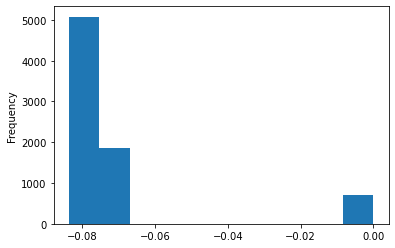

In [12]:
from matplotlib import pyplot as plt
a['Auxiliary channel TU1 U(V)'].plot(kind='hist')
plt.show()

# DATA_VIZ


In [38]:
import pandas as pd
from matplotlib import pyplot as plt
a = pd.read_csv('detailVolDownsampled.csv')

In [39]:
a.columns

Index(['Realtime', 'Unnamed: 1', 'Record ID', 'Auxiliary channel TU1 U(V)',
       'Gap of Voltage'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

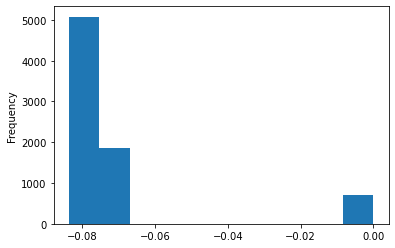

In [34]:
a['Auxiliary channel TU1 U(V)'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

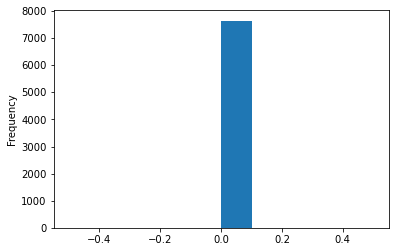

In [35]:
a['Gap of Voltage'].plot(kind='hist')

In [37]:
b = pd.read_csv('detailTempDownsampled.csv')
b.columns

Index(['Realtime', 'Unnamed: 1', 'Record ID', 'Auxiliary channel TU1 T(°C)',
       'Gap of Temperature'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

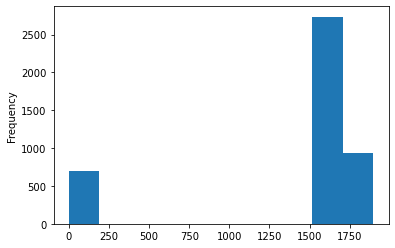

In [41]:
b['Auxiliary channel TU1 T(°C)'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

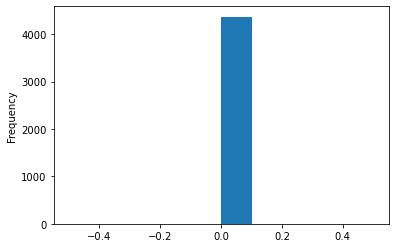

In [42]:
b['Gap of Temperature'].plot(kind='hist')

In [43]:
c = pd.read_csv('detailDownsampled.csv')
c.columns

Index(['Realtime', 'Unnamed: 1', 'Record Index', 'JumpTo', 'Cycle', 'Step',
       'Cur(mA)', 'Voltage(V)', 'CapaCity(mAh)', 'Energy(mWh)'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

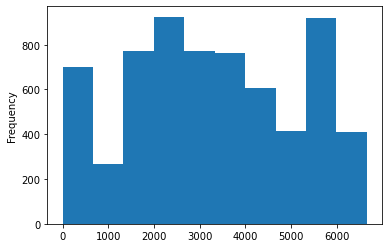

In [44]:
c['JumpTo'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

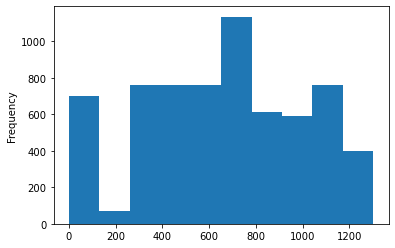

In [45]:
c['Cycle'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

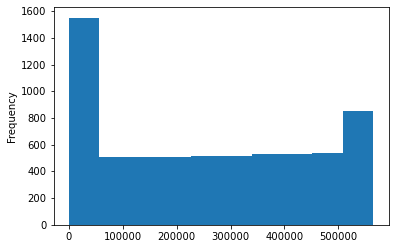

In [46]:
c['Energy(mWh)'].plot(kind='hist')